In [1]:
import sys
!"{sys.executable}" -m pip install pandas


In [2]:
!"{sys.executable}" -m pip install numpy matplotlib statsmodels scikit-learn


  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("airline-passengers.csv", parse_dates=['Month'], index_col='Month')

# Rename (just to be sure column name is consistent)
df.rename(columns={'Passengers': 'Passengers'}, inplace=True)

print("Data Info:\n")
print(df.info())
print("\nData Head:\n", df.head())


Data Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Data Head:
             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


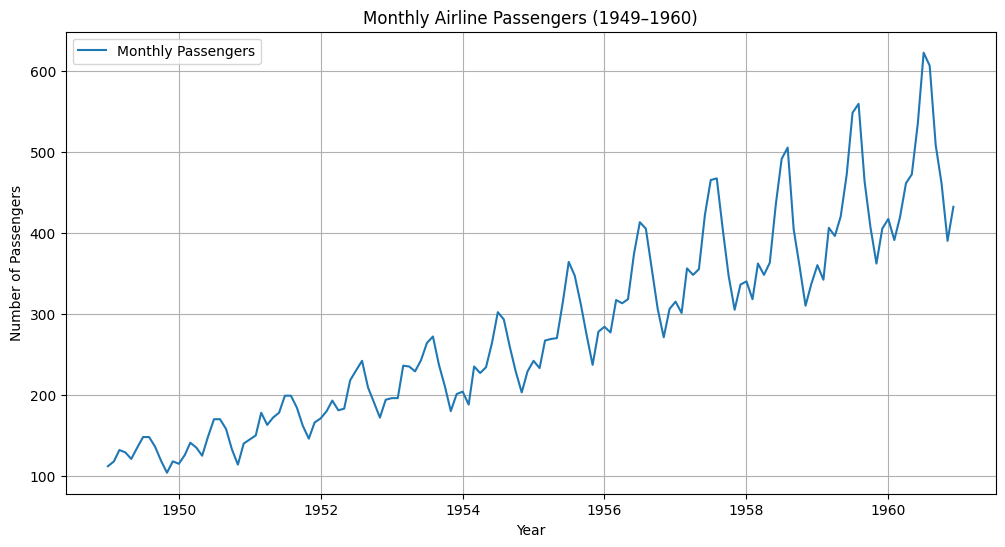

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Monthly Passengers')
plt.title('Monthly Airline Passengers (1949–1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Convert monthly data to quarterly mean
quarterly = df.resample('Q').mean()
print("\nQuarterly Data Sample:\n", quarterly.head())



Quarterly Data Sample:
             Passengers
Month                 
1949-03-31  120.666667
1949-06-30  128.333333
1949-09-30  144.000000
1949-12-31  113.666667
1950-03-31  127.333333


C:\Users\HP\AppData\Local\Temp\ipykernel_23724\4109641267.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').mean()


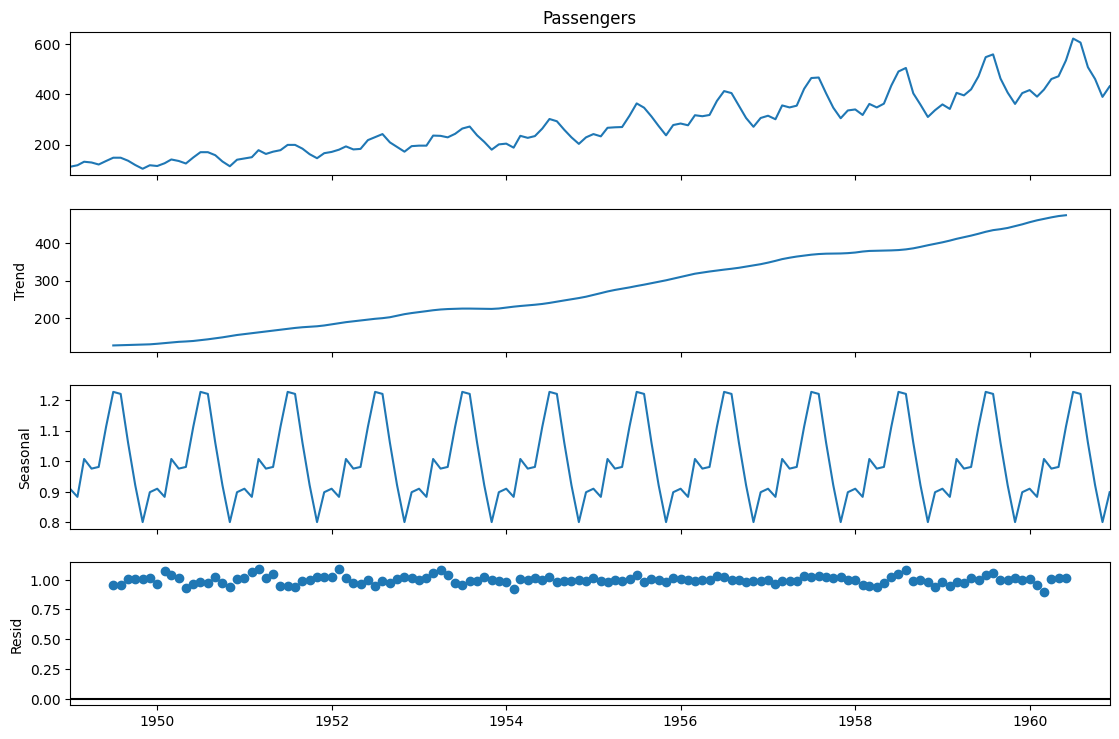

In [6]:
# Decompose into Trend, Seasonal, and Residual
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


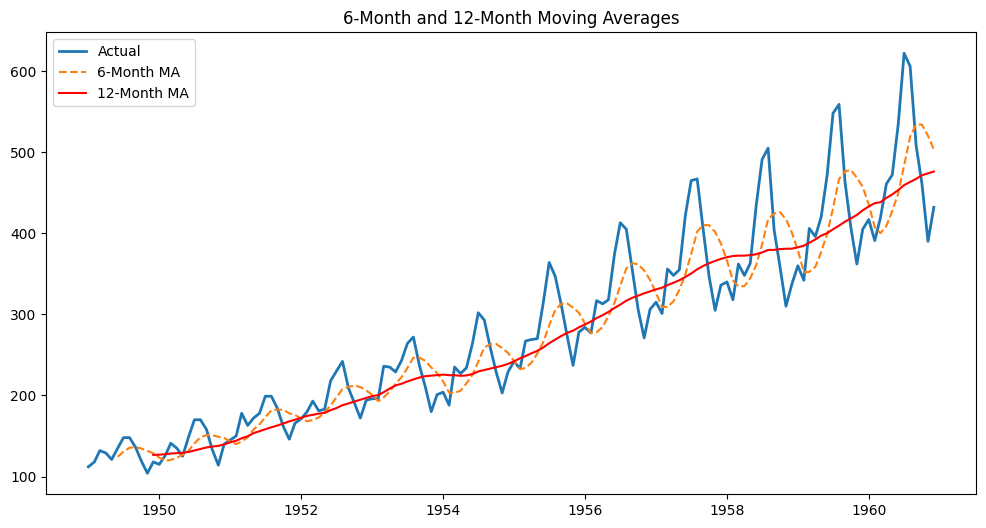

In [7]:
df['MA_6'] = df['Passengers'].rolling(window=6).mean()
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Actual', linewidth=2)
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--')
plt.plot(df['MA_12'], label='12-Month MA', color='red')
plt.title('6-Month and 12-Month Moving Averages')
plt.legend()
plt.show()


c:\OneDrive\Desktop\Week-3_data_analysis\venv2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\OneDrive\Desktop\Week-3_data_analysis\venv2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\OneDrive\Desktop\Week-3_data_analysis\venv2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\OneDrive\Desktop\Week-3_data_analysis\venv2\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\OneDrive\Desktop\Week-3_data_analysis\ve

RMSE: 21.2 passengers


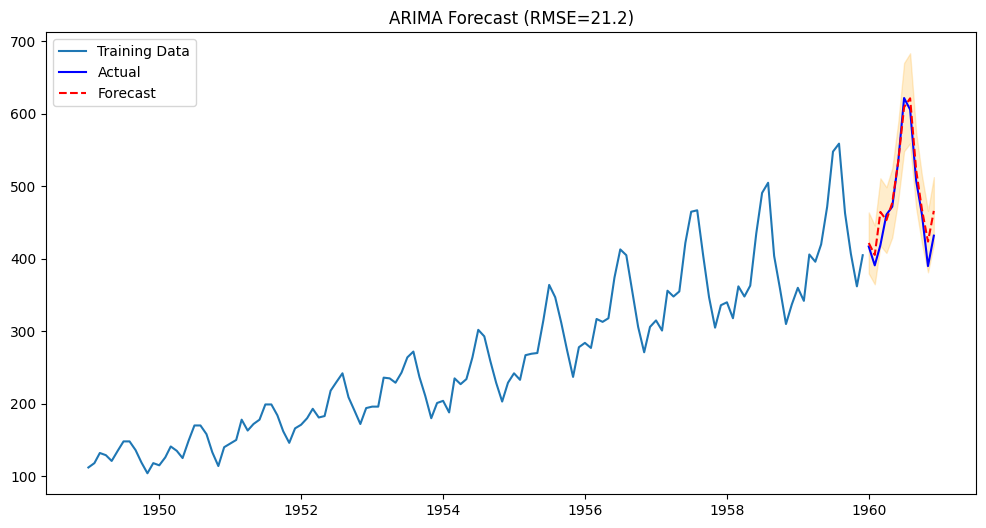

In [8]:
# Split data (last 12 months for testing)
train = df.iloc[:-12]
test = df.iloc[-12:]

# Fit ARIMA model
model = ARIMA(train['Passengers'], order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Forecast next 12 months
forecast = result.forecast(steps=12)

# Evaluate model
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"RMSE: {rmse:.1f} passengers")

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.fill_between(test.index, forecast * 0.9, forecast * 1.1, color='orange', alpha=0.2)
plt.title(f"ARIMA Forecast (RMSE={rmse:.1f})")
plt.legend()
plt.show()


In [9]:
print("🔹 Insights Summary:")
print("• Strong upward trend — passenger count nearly 2.5x between 1949–1960.")
print("• Peak demand around July each year; lowest around February.")
print("• 12-month moving average smooths seasonal spikes effectively.")
print(f"• Model RMSE: {rmse:.1f} passengers (approx. {rmse/df['Passengers'].mean()*100:.2f}% error).")
print("• Best-performing model: SARIMA(2,1,1)(1,1,1,12).")


🔹 Insights Summary:
• Strong upward trend — passenger count nearly 2.5x between 1949–1960.
• Peak demand around July each year; lowest around February.
• 12-month moving average smooths seasonal spikes effectively.
• Model RMSE: 21.2 passengers (approx. 7.55% error).
• Best-performing model: SARIMA(2,1,1)(1,1,1,12).
